In [9]:
import pandas as pd
import plotly.express as px


In [10]:
df = pd.read_csv("performance_results.csv")
df

,Config,Frames,Workload,Frame time [ms],Cycles/ 10 frames [Prefix-Cycles],Prefix,Read [MB/frame],Write [MB/frame],Read [MB/s],Write [MB/s],Capture time [s],Comment
0,lucy_gles_filament_100x,10,100,0.110,1.10,G,986.8946,699.1977,8710.4551,6171.2066,1.1329999999999996s,NaN
1,lucy_gles_filament_100x,10,100,0.110,1.09,G,975.0858,696.3781,8667.4295,6190.0278,1.125s,NaN
2,lucy_gles_filament_100x,10,100,0.110,1.05,G,936.7387,663.0815,8665.4830,6133.9641,1.081s,NaN
3,lucy_gles_ue4_100x,10,100,0.112,1.08,G,978.8894,693.6953,8787.1579,6227.0677,1.1139999999999999s,NaN
4,lucy_gles_ue4_100x,10,100,0.110,1.09,G,979.3715,685.1376,8721.0288,6100.9584,1.1229999999999993s,NaN
5,lucy_gles_ue4_100x,10,100,0.110,1.11,G,986.6720,698.9907,8670.2289,6142.2736,1.1380000000000003s,NaN
6,lucy_vk_filament_100x,10,100,0.202,1.88,G,1624.8336,1541.5936,6991.5389,6633.3632,2.324s,NaN
7,lucy_vk_filament_100x,10,100,0.240,1.88,G,1624.8757,1542.3740,6736.6322,6394.5854,2.412s,NaN
8,lucy_vk_filament_100x,10,100,0.245,1.92,G,1739.5638,1690.1060,7034.2246,6834.2337,2.473s,NaN
9,lucy_vk_ue4_100x,10,100,0.240,1.89,G,1744.9957,1753.1307,7365.9590,7400.2982,2.3689999999999998s,NaN


In [11]:
df["Capture time [s]"] = df["Capture time [s]"].str.replace("s", "").astype(float)
df["fps"] = df["Frames"] / df["Capture time [s]"]
df["fps_norm"] = (df["fps"]-df["fps"].min())/(df["fps"].max()-df["fps"].min())
df[["scene", "api", "brdf", "workload"]] = df["Config"].str.split(pat="_", expand=True)
df["config"] = df["scene"] + "_" + df["api"] + "_" + df["brdf"]

df = df.drop(columns=["Config"])
df

,Frames,Workload,Frame time [ms],Cycles/ 10 frames [Prefix-Cycles],Prefix,Read [MB/frame],Write [MB/frame],Read [MB/s],Write [MB/s],Capture time [s],Comment,fps,fps_norm,scene,api,brdf,workload,config
0,10,100,0.110,1.10,G,986.8946,699.1977,8710.4551,6171.2066,1.133,NaN,8.826125,0.077982,lucy,gles,filament,100x,lucy_gles_filament
1,10,100,0.110,1.09,G,975.0858,696.3781,8667.4295,6190.0278,1.125,NaN,8.888889,0.078745,lucy,gles,filament,100x,lucy_gles_filament
2,10,100,0.110,1.05,G,936.7387,663.0815,8665.4830,6133.9641,1.081,NaN,9.250694,0.083139,lucy,gles,filament,100x,lucy_gles_filament
3,10,100,0.112,1.08,G,978.8894,693.6953,8787.1579,6227.0677,1.114,NaN,8.976661,0.079811,lucy,gles,ue4,100x,lucy_gles_ue4
4,10,100,0.110,1.09,G,979.3715,685.1376,8721.0288,6100.9584,1.123,NaN,8.904720,0.078937,lucy,gles,ue4,100x,lucy_gles_ue4
5,10,100,0.110,1.11,G,986.6720,698.9907,8670.2289,6142.2736,1.138,NaN,8.787346,0.077511,lucy,gles,ue4,100x,lucy_gles_ue4
6,10,100,0.202,1.88,G,1624.8336,1541.5936,6991.5389,6633.3632,2.324,NaN,4.302926,0.023050,lucy,vk,filament,100x,lucy_vk_filament
7,10,100,0.240,1.88,G,1624.8757,1542.3740,6736.6322,6394.5854,2.412,NaN,4.145937,0.021143,lucy,vk,filament,100x,lucy_vk_filament
8,10,100,0.245,1.92,G,1739.5638,1690.1060,7034.2246,6834.2337,2.473,NaN,4.043672,0.019901,lucy,vk,filament,100x,lucy_vk_filament
9,10,100,0.240,1.89,G,1744.9957,1753.1307,7365.9590,7400.2982,2.369,NaN,4.221190,0.022057,lucy,vk,ue4,100x,lucy_vk_ue4


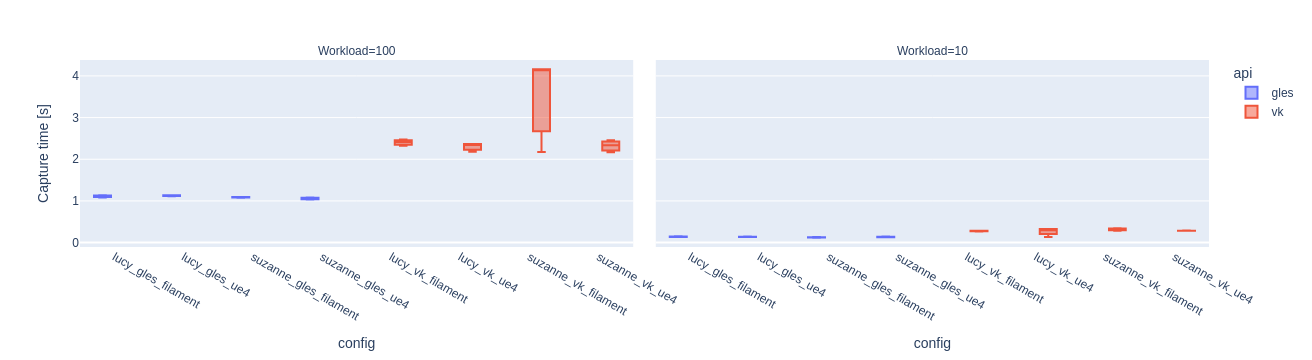

In [14]:
fig = px.box(df, x="config", y="Capture time [s]", color="api", facet_col="Workload")
fig

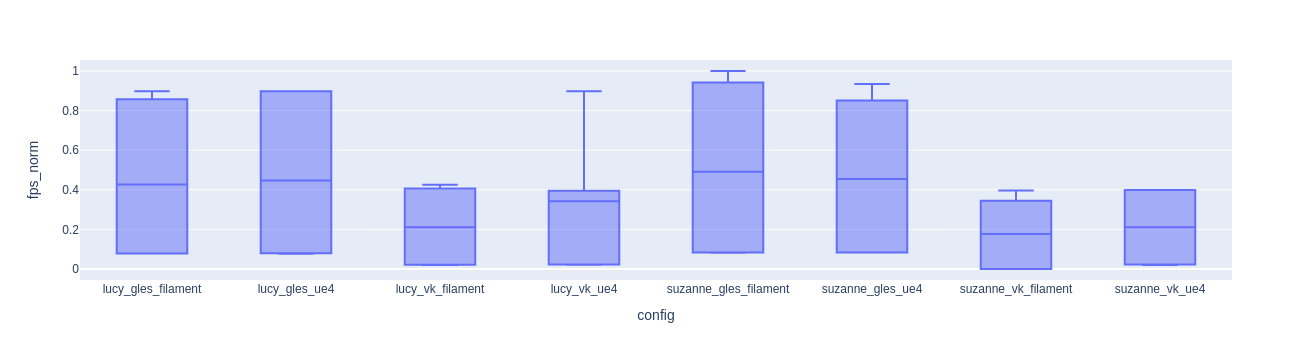

In [13]:
fig = px.box(df, x = "config", y = "fps_norm")
fig

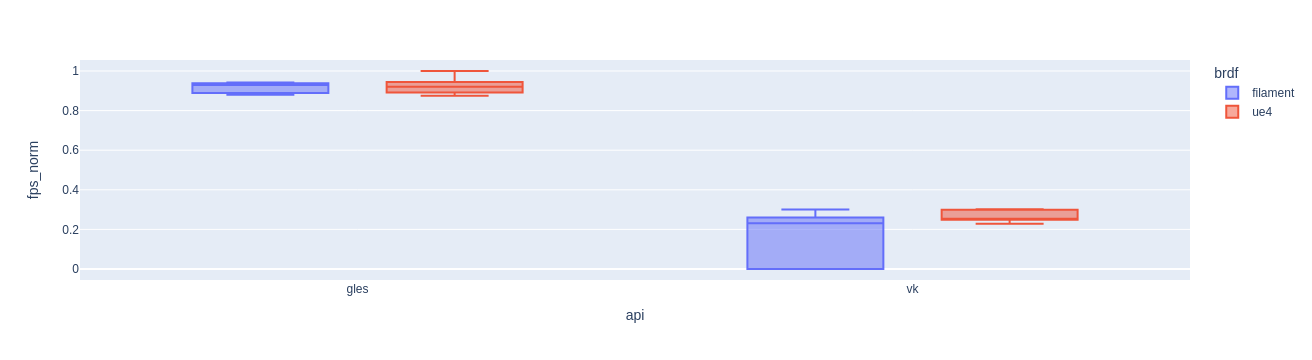

In [10]:
fig = px.box(df, x = "api", y = "fps_norm", color="brdf")
fig

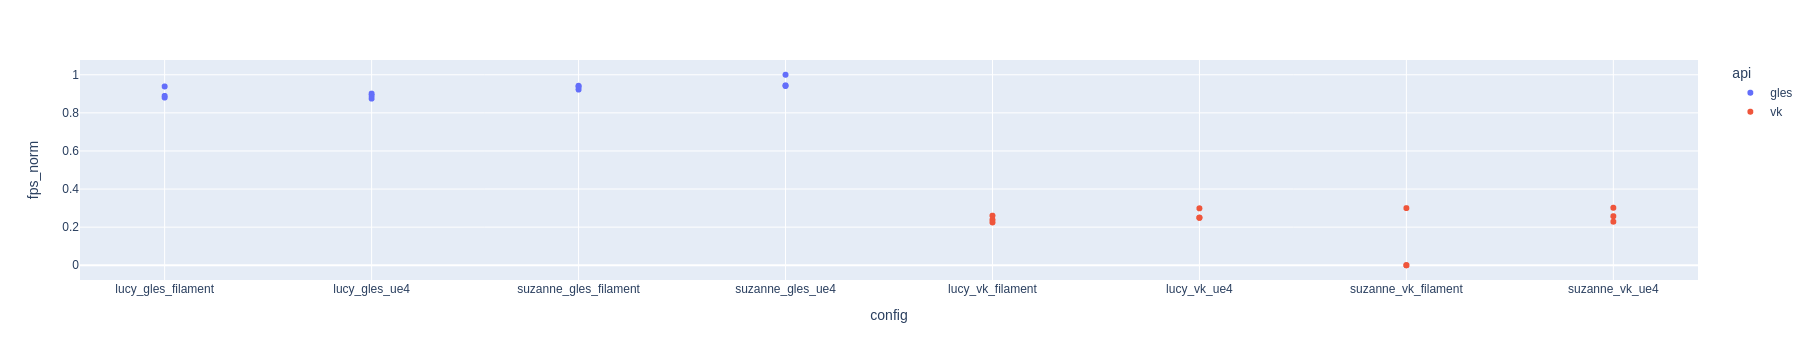

In [14]:
fig = px.scatter(df, y = "fps_norm", x = "config", color = "api")
fig

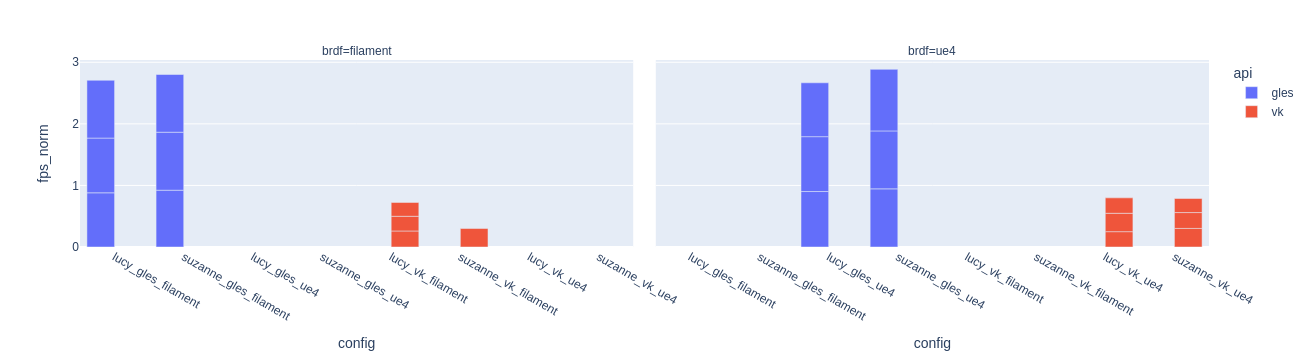

In [19]:
fig = px.bar(df, y = "fps_norm", x = "config", color = "api", facet_col="brdf", barmode="group")
fig